<a href="https://colab.research.google.com/github/miles-garcia/DSPS_MGarcia/blob/main/HW9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.zip  training.zip
higgs-boson.zip                          test.zip


In [ ]:
cd /content/drive/MyDrive/PHYS661/

/content/drive/MyDrive/PHYS661


In [ ]:
ls

 earthquakes.csv                         inception5h.zip       runtime.png
 earthquakes_MGarcia.txt                 kaggleHiggs/          tensorflow_inception_graph.pb
 earthquakes.txt                         LICENSE               wine.data
 HW9.ipynb                               MC_Ex.ipynb           wine.names
 illuminati.jpg                         'Notes PHYS661.gdoc'
 imagenet_comp_graph_label_strings.txt  'P661 HW3.ipynb'


In [ ]:
#!mv kaggle.json .kaggle.json

In [ ]:
#!chmod 600 .kaggle.json

In [ ]:
#pip install kaggle

In [ ]:
import pandas as pd
import numpy as np
import pylab as pl
import os
import json
import matplotlib.pyplot as plt

In [ ]:
#envs = json.load(open(".kaggle.json", "r"))
#os.environ["KAGGLE_USERNAME"] = envs['username']
#os.environ["KAGGLE_KEY"] = envs['key']

In [ ]:
#!kaggle datasets list

In [ ]:
#!mkdir kaggleHiggs

In [ ]:
cd kaggleHiggs/

/content/drive/MyDrive/PHYS661/kaggleHiggs


In [ ]:
#!kaggle competitions download -c higgs-boson

- Download the Higgs boson data from Kaggle (programmatically within the notebook)
see how I did it in the Titanic Trees notebook https://github.com/fedhere/DSPS_FBianco/blob/main/CodeDemos/titanictree.ipynb

find the correct API link here https://www.kaggle.com/c/higgs-boson/data



- Read in the trainind data. Split the provided training data into a training and a test set.
The last 2 columns are what you want to predict: "weight" and "label".
Remove them from the input data and create a separate variable label and a separate variable weight, which will be your target variables for, respectively, classification and regression.



In [ ]:
#! unzip "higgs-boson.zip" -d ./

In [ ]:
ls

HiggsBosonCompetition_AMSMetric_rev1.py  random_submission.zip  training.zip
higgs-boson.zip                          test.zip


In [ ]:
higgsdata = pd.read_csv('training.zip')

In [ ]:
higgsdata.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b


In [ ]:
higgsdata.describe()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,...,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,224999.500000,-49.023079,49.239819,81.181982,57.895962,-708.420675,-601.237051,-709.356603,2.373100,18.917332,...,209.797178,0.979176,-348.329567,-399.254314,-399.259788,-692.381204,-709.121609,-709.118631,73.064591,1.646767
std,72168.927986,406.345647,35.344886,40.828691,63.655682,454.480565,657.972302,453.019877,0.782911,22.273494,...,126.499506,0.977426,532.962789,489.338286,489.333883,479.875496,453.384624,453.389017,98.015662,1.875103
min,100000.000000,-999.000000,0.000000,6.329000,0.000000,-999.000000,-999.000000,-999.000000,0.208000,0.000000,...,13.678000,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0.000000,0.001502
25%,162499.750000,78.100750,19.241000,59.388750,14.068750,-999.000000,-999.000000,-999.000000,1.810000,2.841000,...,123.017500,0.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-0.000000,0.018636
50%,224999.500000,105.012000,46.524000,73.752000,38.467500,-999.000000,-999.000000,-999.000000,2.491500,12.315500,...,179.739000,1.000000,38.960000,-1.872000,-2.093000,-999.000000,-999.000000,-999.000000,40.512500,1.156188
75%,287499.250000,130.606250,73.598000,92.259000,79.169000,0.490000,83.446000,-4.593000,2.961000,27.591000,...,263.379250,2.000000,75.349000,0.433000,0.503000,33.703000,-2.457000,-2.275000,109.933750,2.404128
max,349999.000000,1192.026000,690.075000,1349.351000,2834.999000,8.503000,4974.979000,16.690000,5.684000,2834.999000,...,2003.976000,3.000000,1120.573000,4.499000,3.141000,721.456000,4.500000,3.142000,1633.433000,7.822543


In [ ]:
higgsdata.shape

(250000, 33)

In [ ]:
higgsdata

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
0,100000,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,41.928,...,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497,0.002653,s
1,100001,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,2.078,...,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226,2.233584,b
2,100002,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,9.336,...,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251,2.347389,b
3,100003,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,0.414,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,5.446378,b
4,100004,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,16.405,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,6.245333,b
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,349995,-999.000,71.989,36.548,5.042,-999.00,-999.000,-999.000,1.392,5.042,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,4.505083,b
249996,349996,-999.000,58.179,68.083,22.439,-999.00,-999.000,-999.000,2.585,22.439,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,-0.000,2.497259,b
249997,349997,105.457,60.526,75.839,39.757,-999.00,-999.000,-999.000,2.390,22.183,...,1,41.992,1.800,-0.166,-999.000,-999.00,-999.000,41.992,0.018636,s
249998,349998,94.951,19.362,68.812,13.504,-999.00,-999.000,-999.000,3.365,13.504,...,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000,1.681611,b


In [ ]:
higgsdata.columns

Index(['EventId', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt',
       'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality',
       'DER_lep_eta_centrality', 'PRI_tau_pt', 'PRI_tau_eta', 'PRI_tau_phi',
       'PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_met', 'PRI_met_phi',
       'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_leading_pt',
       'PRI_jet_leading_eta', 'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi', 'PRI_jet_all_pt',
       'Weight', 'Label'],
      dtype='object')

In [ ]:
higgsdata['DER_mass_MMC'].value_counts()[-999] #looking though the data to see -999s

38114

In [ ]:
for col in higgsdata.columns: #where are the -999s column-wise?
  print(col)
  try:
    print(str(higgsdata[col].value_counts()[-999]))
  except KeyError:
    print("0")
  except IndexError:
    continue
  print(" ")

EventId
0
 
DER_mass_MMC
38114
 
DER_mass_transverse_met_lep
0
 
DER_mass_vis
0
 
DER_pt_h
0
 
DER_deltaeta_jet_jet
177457
 
DER_mass_jet_jet
177457
 
DER_prodeta_jet_jet
177457
 
DER_deltar_tau_lep
0
 
DER_pt_tot
0
 
DER_sum_pt
0
 
DER_pt_ratio_lep_tau
0
 
DER_met_phi_centrality
0
 
DER_lep_eta_centrality
177457
 
PRI_tau_pt
0
 
PRI_tau_eta
0
 
PRI_tau_phi
0
 
PRI_lep_pt
0
 
PRI_lep_eta
0
 
PRI_lep_phi
0
 
PRI_met
0
 
PRI_met_phi
0
 
PRI_met_sumet
0
 
PRI_jet_num
0
 
PRI_jet_leading_pt
99913
 
PRI_jet_leading_eta
99913
 
PRI_jet_leading_phi
99913
 
PRI_jet_subleading_pt
177457
 
PRI_jet_subleading_eta
177457
 
PRI_jet_subleading_phi
177457
 
PRI_jet_all_pt
0
 
Weight
0
 
Label


I decided not to remove anything. Although some columns have a lot of missing info, some entries in that column do have real data, so removing it might be an issue for finding a rare particle. If I find that my scores are bad, I can always go back and try again after removing the columns.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_train, data_test = train_test_split(higgsdata, test_size = 0.3)

In [ ]:
data_train.head()

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt,Weight,Label
156393,256393,-999.000,105.994,118.854,73.447,-999.000,-999.000,-999.000,3.068,73.447,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,0.000,6.584170,b
7430,107430,120.012,35.812,76.726,48.034,-999.000,-999.000,-999.000,2.733,22.547,...,1,61.172,3.372,1.672,-999.000,-999.000,-999.000,61.172,0.309795,b
220737,320737,83.750,71.550,67.587,11.535,-999.000,-999.000,-999.000,2.495,11.535,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,0.307170,b
52477,152477,70.926,35.406,49.564,113.206,3.679,523.819,-3.373,1.303,28.966,...,3,144.317,1.737,-1.696,47.156,-1.942,0.188,222.717,1.044978,b
2418,102418,103.550,80.266,81.895,6.711,-999.000,-999.000,-999.000,2.639,6.711,...,0,-999.000,-999.000,-999.000,-999.000,-999.000,-999.000,-0.000,2.136327,b


In [ ]:
labels_train = np.asarray(data_train["Label"]) #get the labels for the training and test sets before i remove it
labels_test = np.asarray(data_test["Label"])

In [ ]:
labels_train, labels_test

(array(['b', 'b', 'b', ..., 'b', 's', 'b'], dtype=object),
 array(['s', 'b', 'b', ..., 'b', 'b', 'b'], dtype=object))

In [ ]:
len(labels_test[labels_test=='b'])

49407

In [ ]:
weights_train = np.asarray(data_train["Weight"]) #get the weights also
weights_test = np.asarray(data_test["Weight"])

In [ ]:
weights_train, weights_test

(array([6.58417002e+00, 3.09795156e-01, 3.07169524e-01, ...,
        1.80738953e+00, 2.65331134e-03, 4.95700477e+00]),
 array([0.01863612, 0.91161881, 1.68161144, ..., 1.68161144, 1.68161144,
        6.20790608]))

In [ ]:
data_train.drop(columns = ["Weight", "Label"], inplace=True) #remove weights and labels from train and test sets

In [ ]:
data_test.drop(columns = ["Weight", "Label"], inplace=True)

- Use a Random Forest and a Gradiend Boosted Tree Classifier model to predict the label of the particles. get the score of the model on the training and test set and comment on the result for each model.


In [ ]:
data_test

,EventId,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
41966,141966,130.429,32.925,89.792,1.538,-999.0,-999.000,-999.00,3.086,1.538,...,-3.028,57.476,0,-999.000,-999.000,-999.00,-999.000,-999.000,-999.000,0.000
82269,182269,37.383,75.034,34.707,27.213,-999.0,-999.000,-999.00,1.038,9.998,...,-2.126,219.129,1,36.691,-0.489,-0.77,-999.000,-999.000,-999.000,36.691
130892,230892,110.697,43.657,69.694,28.760,-999.0,-999.000,-999.00,2.859,28.760,...,-2.286,67.754,0,-999.000,-999.000,-999.00,-999.000,-999.000,-999.000,-0.000
241193,341193,-999.000,113.633,77.161,10.704,-999.0,-999.000,-999.00,1.813,10.704,...,2.860,99.907,0,-999.000,-999.000,-999.00,-999.000,-999.000,-999.000,-0.000
27103,127103,108.292,4.751,75.921,3.912,-999.0,-999.000,-999.00,3.159,3.912,...,2.761,88.591,0,-999.000,-999.000,-999.00,-999.000,-999.000,-999.000,-0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214234,314234,107.518,55.063,64.834,0.578,-999.0,-999.000,-999.00,3.140,0.578,...,1.744,47.816,0,-999.000,-999.000,-999.00,-999.000,-999.000,-999.000,0.000
152081,252081,158.754,87.873,85.573,40.706,2.6,151.346,2.85,3.416,36.182,...,2.430,257.810,3,43.802,3.431,-1.00,37.317,0.831,0.542,111.322
10774,110774,69.867,59.085,46.376,81.194,-999.0,-999.000,-999.00,1.864,3.398,...,-1.997,147.789,1,84.352,0.218,1.53,-999.000,-999.000,-999.000,84.352
102971,202971,72.967,45.266,57.497,2.901,-999.0,-999.000,-999.00,2.521,2.901,...,-1.192,67.619,0,-999.000,-999.000,-999.00,-999.000,-999.000,-999.000,0.000


In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_classification

# Look at parameters used by our current forest
rf = RandomForestClassifier(random_state = 0, max_depth = 4)
print('Parameters currently in use:\n')
print(rf.get_params())

Parameters currently in use:

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}


In [ ]:
len(labels_train)

175000

In [ ]:
GradientBoostingClassifier?

In [ ]:
gbt = GradientBoostingClassifier(max_depth=4, random_state=1)

In [ ]:
rf.fit(data_train,labels_train)


RandomForestClassifier(max_depth=4, random_state=0)

In [ ]:
gbt.fit(data_train,labels_train)

GradientBoostingClassifier(max_depth=4, random_state=1)

In [ ]:
y_pred_rf = rf.predict(data_test)

In [ ]:
y_pred_gbt = gbt.predict(data_test)

calculate the  scores for the training and test sets and evaluate  overtraining etc

In [ ]:
rf.score(data_train,labels_train), rf.score(data_test,labels_test) #scores

(0.81176, 0.80916)

For the RF, we see a pretty good score for the training set, at 0.81, and a slight decrease to the test set to 0.809, which is good. This suggests we do not have overfitting/overtraining.

In [ ]:
gbt.score(data_train,labels_train), gbt.score(data_test,labels_test)

(0.8402114285714286, 0.8371466666666667)

The GBT score is slightly better than the RF score. We once again see a slight decrease from train to test which is what we want. This again suggests no overtraining/fitting.

In [ ]:
y_pred_gbt

array(['s', 'b', 's', ..., 'b', 'b', 'b'], dtype=object)

- Produce a confusion matrix for each model and compare them






In [ ]:

# I creaded this function (mostly copied from sklearn examples).
# You can use it to create the confusion matrix
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(y_true, y_pred,
                          normalize=False,
                          title='',
                          cmap=pl.cm.bone):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
          title = title + ' Normalized confusion matrix'
    else:
          title = title + ' Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # plot it
    fig, ax = plt.subplots(1, 1)
    fig.subplots_adjust()
    im = ax.imshow(cm, cmap=cmap)
    ax_divider = make_axes_locatable(ax)
    # add an axes to the right of the main axes.
    pl.xticks([0, 1], labels=["N", "P"])
    pl.ylim(-0.5,1.5)
    pl.yticks([0,1], labels=["N", "P"])
    pl.title(title)
    cax = ax_divider.append_axes("right", size="10%", pad="2%")
    cb = pl.colorbar(im, cax=cax)


In [ ]:
confusion_matrix?

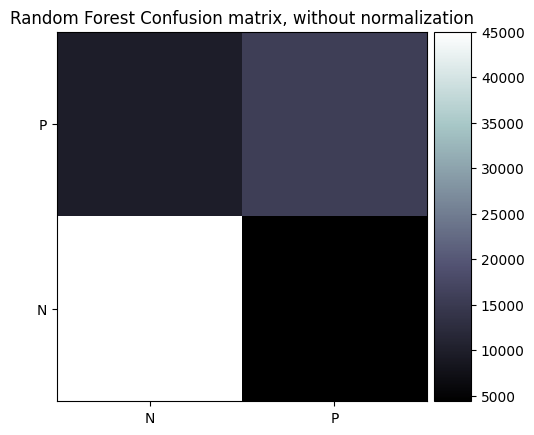

In [ ]:
plot_confusion_matrix(labels_test,y_pred_rf,title='Random Forest',normalize=False)

Figure 1. This shows the confusion matrix for the RF. We can see that the model predicts a lot of background that is actually background, although this is boosted by the fact that background was the majority of the data. It also predicted a lot of signal that was signal. The diagonal (b/s and s/b) are the smallest ones which we'd expect given that the score was pretty good.

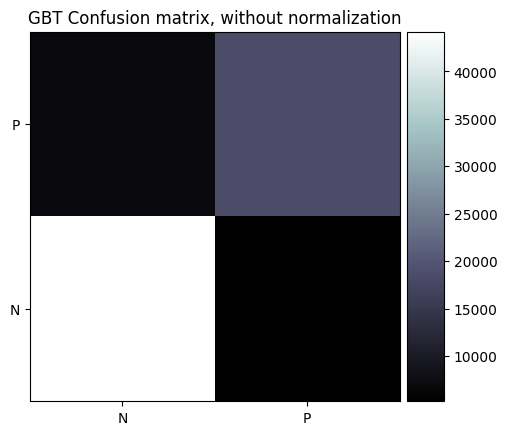

In [ ]:
plot_confusion_matrix(labels_test,y_pred_gbt,title='GBT',normalize=False)

Figure 2. This is the confusion matrix for the GBT classifier. It looks pretty similar to the RF one, but the diagonal is slightly more populated than in the RF confusion matrix. However, the s/s and b/b are still by far the biggest entries.

#required for 661, EC for 461
- Use a Random Forest and a Gradiend Boosted Tree Regressor model to predict the weight of the particles. Compare the model performance on training and test setsm


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfR = RandomForestRegressor(n_estimators=100, max_depth=3,
                                  random_state=0)


In [ ]:
rfR.fit(data_train,weights_train)

RandomForestRegressor(max_depth=3, random_state=0)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbtR = GradientBoostingRegressor(max_depth=3,random_state=0)
gbtR.fit(data_train, weights_train)

GradientBoostingRegressor(random_state=0)

In [ ]:
y_pred_rfR = rfR.predict(data_test)

In [ ]:
y_pred_gbtR = gbtR.predict(data_test)

In [ ]:
rfR.score(data_train,weights_train), rfR.score(data_test,weights_test)

(0.4782864279594389, 0.4807678891056275)

The score for the Random Forest Regressor is pretty bad, and the test score is (slightly) bigger than the training score. All in all I think there's not big overtraining or overfitting, but the score is still bad, meaning that the RFR is not very good at predicting the weights.

In [ ]:
gbtR.score(data_train,weights_train), gbtR.score(data_test,weights_test)

(0.6170775450582117, 0.6113167935475974)

For the GBT Regressor, the score is better than the RF Regressor, and the training score is slightly bigger than the test score, so the GBT regressor is doing a better job overall than the RF regressor. Again, probably little overfitting/overtraining.

 Calculate the L2 and L1 loss functions for the fitted regression models (see slides for the definition) and discuss the results

In [ ]:
y_pred_gbtR_train = gbtR.predict(data_train)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

test_score = np.zeros((100,), dtype=np.float64)
test_score_2 = np.zeros((100,), dtype=np.float64)
for i, y_pred_gbtR in enumerate(gbtR.staged_predict(data_test)):
    test_score[i] = mean_squared_error(weights_test, y_pred_gbtR) #get the MSE for each iteration of the GBT

for i, y_pred_gbtR_train in enumerate(gbtR.staged_predict(data_train)):
    test_score_2[i] = mean_squared_error(weights_train, y_pred_gbtR_train)

In [ ]:
test_score_L1 = np.zeros((100,), dtype=np.float64)
test_score_L1_2 = np.zeros((100,), dtype=np.float64)
for i, y_pred_gbtR in enumerate(gbtR.staged_predict(data_test)):
    test_score_L1[i] = mean_absolute_error(weights_test, y_pred_gbtR) #get MAE for each iteration

for i, y_pred_gbtR_train in enumerate(gbtR.staged_predict(data_train)):
    test_score_L1_2[i] = mean_absolute_error(weights_train, y_pred_gbtR_train)

In [ ]:
test_score_2

array([3.20059063, 2.94399132, 2.72985187, 2.55535233, 2.40775653,
       2.27712608, 2.16655379, 2.0763888 , 1.99710094, 1.92908783,
       1.86899679, 1.81843588, 1.77553764, 1.73591699, 1.70204336,
       1.67049367, 1.64557516, 1.61947133, 1.59745041, 1.5797737 ,
       1.5616302 , 1.54524675, 1.53277273, 1.51962239, 1.50824316,
       1.49914572, 1.48917729, 1.47876708, 1.47217275, 1.46554324,
       1.45939443, 1.45134777, 1.44630509, 1.44043858, 1.43593324,
       1.43265222, 1.42804384, 1.42482716, 1.421821  , 1.41840637,
       1.41619579, 1.41300159, 1.41045216, 1.40808006, 1.40497244,
       1.40233195, 1.40019737, 1.39844569, 1.39654275, 1.39489147,
       1.39361298, 1.39230554, 1.39076271, 1.38957692, 1.38755288,
       1.38609377, 1.38449233, 1.38230714, 1.38100163, 1.37988566,
       1.37878936, 1.37772123, 1.37675427, 1.37549124, 1.37448762,
       1.37290175, 1.37221578, 1.37094736, 1.36960663, 1.36871898,
       1.36778732, 1.3669495 , 1.36607237, 1.36534229, 1.36485

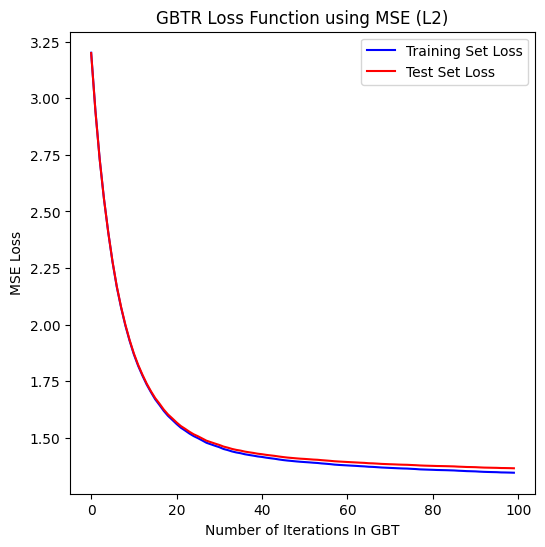

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("GBTR Loss Function using MSE (L2)")
plt.plot(np.arange(100),test_score_2,"b-",label="Training Set Loss")
plt.plot(np.arange(100), test_score, "r-", label="Test Set Loss")
plt.xlabel("Number of Iterations In GBT")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

Figure 3. Loss function as a function of number of estimators for the GBT Regressor, using Mean Squared Error (L2) as the loss function metric. We can see that both improve heavily as we use more and more estimators until arond 20-30, and then the rate slows down. At the end, the training set loss is slightly better than the test set loss, which matches what we'd expect.

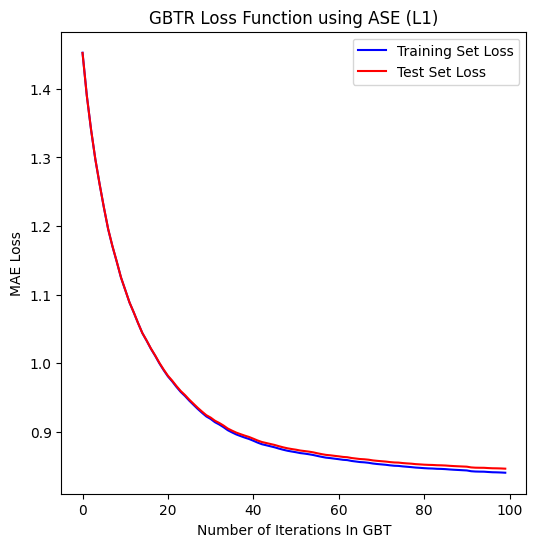

In [ ]:
fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("GBTR Loss Function using ASE (L1)")
plt.plot(np.arange(100),test_score_L1_2,"b-",label="Training Set Loss")
plt.plot(np.arange(100), test_score_L1, "r-", label="Test Set Loss")
plt.xlabel("Number of Iterations In GBT")
plt.ylabel("MAE Loss")
plt.legend()
plt.show()

Figure 4. Loss function for GBT regressor as function of # estimators using Mean Absolute Error instead of MSE. Very similar to the MSE loss with the train set ending up slightly smaller than the test set. Here, though, the rate doesn't slow down around 20-30 iterations as much as in the MSE loss.

In [ ]:
GBTR_L1_test = mean_absolute_error(weights_test, y_pred_gbtR)
GBTR_L1_train = mean_absolute_error(weights_train, y_pred_gbtR_train)
print("GBTR L1 Loss for Test Data = %.3f"%GBTR_L1_test)
print("GBTR L1 Loss for Training Data = %.3f"%GBTR_L1_train)

GBTR_L2_test = mean_squared_error(weights_test, y_pred_gbtR)
GBTR_L2_train = mean_squared_error(weights_train, y_pred_gbtR_train)
print("GBTR L2 Loss for Test Data = %.3f"%GBTR_L2_test)
print("GBTR L2 Loss for Training Data = %.3f"%GBTR_L2_train)

GBTR L1 Loss for Test Data = 0.846
GBTR L1 Loss for Training Data = 0.840
GBTR L2 Loss for Test Data = 1.366
GBTR L2 Loss for Training Data = 1.347


In [ ]:
y_pred_rfR_train = rfR.predict(data_train)

In [ ]:
rfR_L1_test = mean_absolute_error(weights_test,y_pred_rfR)
rfR_L1_train = mean_absolute_error(weights_train,y_pred_rfR_train)
rfR_L2_test = mean_squared_error(weights_test,y_pred_rfR)
rfR_L2_train = mean_squared_error(weights_train,y_pred_rfR_train)

print("RFR L1 Loss for Test Data = %.3f"%rfR_L1_test)
print("RFR L1 Loss for Training Data = %.3f"%rfR_L1_train)

print("RFR L2 Loss for Test Data = %.3f"%rfR_L2_test)
print("RFR L2 Loss for Training Data = %.3f"%rfR_L2_train)

RFR L1 Loss for Test Data = 1.004
RFR L1 Loss for Training Data = 1.007
RFR L2 Loss for Test Data = 1.825
RFR L2 Loss for Training Data = 1.835


For the Random Forest Regressor, I show the loss values here. The test data has a slightly lower loss than the training data in both instances, which again matches the score being slightly higher for test in the RFR, and suggesting some potential overfitting/overtraining.

# Choose between feature importance and grid optimization (both 461 and 661)

- For the Random Forest classifier, find the 4 most important features based on the simple unoptimized model you created earlier on. Use the documentation to find out what they are. We have not talked abotu the physics of this problem at all but the Kaggle challenge description should provide enogh information for you to comment on this result is somewhat superficially.

You can use ```rf.feature_importance_``` on the trained model to extract the relative importance of each feature (a number from 0 to 1) and then choose the features that have the 4 highest numbers (the numpy function ```argsort()``` is helpful here!)







- Explore the parameter space with the sklearn module ```sklearn.model_selection.RandomizedSearchCV``` *fitting only those 4 features*

Follow this example to set up the parameter search. Set the estimators to 10 and 100, (the number of trees) and the max depth to 3, and 10, and None (let it be unconstrained). Set bootstrap to both True and False. Set the number of features to consider at every split to both "autp" and "sqrt". Use ```pprint``` like I did earlier in this notebook to print the parameters set

**this takes some computational time! so do not start this at the last minute!!**

In [ ]:
rf_fi = rf.feature_importances_
rf_fi

array([1.34975401e-06, 2.72122206e-01, 2.15620250e-01, 9.00343184e-02,
       9.66198572e-03, 3.80641657e-02, 3.13328213e-02, 6.39215261e-03,
       2.10953266e-02, 3.61600200e-03, 1.38570182e-02, 6.26044817e-02,
       5.91163054e-02, 2.96828321e-02, 8.03086742e-02, 2.37352330e-04,
       5.89931446e-06, 1.05496912e-02, 5.56590110e-04, 0.00000000e+00,
       1.25967411e-02, 8.21436445e-06, 8.00513666e-03, 6.09179965e-03,
       9.29269940e-03, 2.94219425e-03, 3.27204944e-03, 1.42966119e-03,
       1.53498788e-03, 1.17225663e-03, 8.79483692e-03])

In [ ]:
np.argsort(rf_fi)

array([19,  0, 16, 21, 15, 18, 29, 27, 28, 25, 26,  9, 23,  7, 22, 30, 24,
        4, 17, 20, 10,  8, 13,  6,  5, 12, 11, 14,  3,  2,  1])

In [ ]:
things = [1,2,3,14]
for i in range(4):
  print("Feature: "+higgsdata.columns[things[i]]+"; Feature Importance: %.4f"%rf_fi[things[i]]) #it sorts from small to big so we need the last 4 entries for biggest feature importance

Feature: DER_mass_MMC; Feature Importance: 0.2721
Feature: DER_mass_transverse_met_lep; Feature Importance: 0.2156
Feature: DER_mass_vis; Feature Importance: 0.0900
Feature: PRI_tau_pt; Feature Importance: 0.0803


These are the four features with the highest feature importance.

DER_mass_MMC-- mass of the Higgs candidate. Seems important as you'll definitely need your candidate particle to have M_Higgs for it to be a Higgs.

DER_mass_transverse_met_lep-- mass of missing (transverse) energy basically

DER_mass_vis-- mass of tau and lepton (I guess these are particles we also see in the detector)?

--> overall, these three mass quantities seem important for conservation of energy, ie., can we recover all the energy going into the collision and identify where the energy has gone to? If we can do that, we can get a good sense of what particles are created in a collision. So these do indeed seem like important quantities.

PRI_tau_pt: transverse (x/y plane, not z) momentum of the tau. Probably important for the other thing we need to conserve, momentum.

Having the four most important features be connected to laws of physics (conservation of E and p) seems like a good place to be.

In [ ]:
data_train_red = data_train[[data_train.columns[1],data_train.columns[2],data_train.columns[3],data_train.columns[14]]] #new dataframe with only the 4 most important features, training and test sets.
data_test_red = data_test[[data_train.columns[1],data_train.columns[2],data_train.columns[3],data_train.columns[14]]]

In [ ]:
param_dist = {'n_estimators': [10,100], #set up the different parameters we want to search through
              'max_depth': [3,10,None],
              'bootstrap': [True,False],
              'max_features': ['auto','sqrt']}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
rand_search = RandomizedSearchCV(rf,param_distributions = param_dist, n_iter=1, cv=3,random_state=111)

 mine and your best features do not necessarily have to be the same because our models may be different (different parameters, different random seed etc)

In [ ]:
rand_search.fit(data_train_red,labels_train)

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=4,
                                                    random_state=0),
                   n_iter=1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [3, 10, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'n_estimators': [10, 100]})

Note that this may take a long time! It took 1 hour for me to run this. Dont start at the last minute!!

In [ ]:
print('Best hyperparameters:',  rand_search.best_params_)

Best hyperparameters: {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': False}


In [ ]:
best_rf = rand_search.best_estimator_

In [ ]:
print("Tuned RF  Parameters: {}".format(rand_search.best_params_))
print("Best score is {}".format(rand_search.best_score_))


Tuned RF  Parameters: {'n_estimators': 10, 'max_features': 'sqrt', 'max_depth': 3, 'bootstrap': False}
Best score is 0.7903199957414331


In [ ]:
df = pd.DataFrame(rand_search.cv_results_)


In [ ]:
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_max_features,param_max_depth,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,1.484812,0.021179,0.173525,0.004478,10,sqrt,3,False,"{'n_estimators': 10, 'max_features': 'sqrt', '...",0.791065,0.79185,0.788045,0.79032,0.001641,1


Plot a simple 3-point ROC curve for the model with the best parameters found in the previous step. Describe it.

In [ ]:
best_rf.fit(data_test, labels_test=="s")

RandomForestClassifier(bootstrap=False, max_depth=3, n_estimators=10,
                       random_state=0)

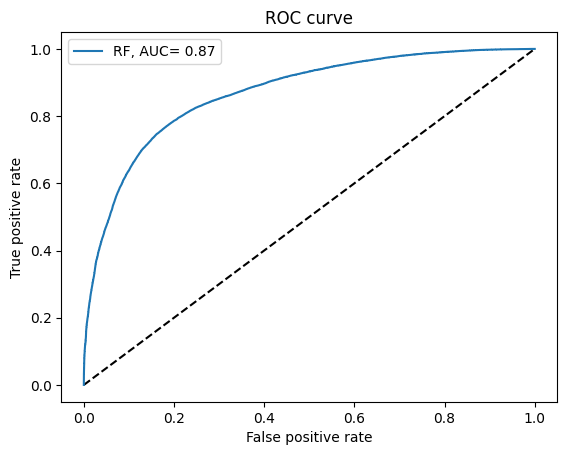

In [ ]:
# The random forest model by itself
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_pred_grd_rfcat = rf.predict_proba(data_test)[:,1]

fpr_rf, tpr_rf, _ = roc_curve(labels_test=="s", y_pred_grd_rfcat)
roc_auc = auc(fpr_rf,tpr_rf)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_rf, tpr_rf, label='RF, AUC= %.2f'%roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()


Figure 5. ROC Curve for the best RF Estimator parameters based on the Randomized CV Search. We can see that the True Positive Rate peaks pretty quickly in terms of False Positive rate, which is what we want, as it means that the model is generally pretty accurate. The area under the curve of 0.87 agrees with that, as AUC = 1 would be perfectly accurate, so it's fairly close to that.